# Defining the question

### Identifying the individuals who are most likely going to click on the Kenyan entrepreneur's ads


## Metric for success

###  supervised learning

## Context

### a Kenyan entreneur has started an online cryptography course and would want to advertise it on her blog. she targets audiences from various countries.



## Experimental design 

### kNN

### SVM

### Naive Bayes

## Appropriateness of the data

### The Kenyan Entrepreneur has already collected the data that will enable me to work on. 

In [1]:
# Loading the dataset
advertising <- read.csv("C:/Users/I/Downloads/advertising.csv")

# Checking the dataset

In [2]:
# checking for the data types in the dataset
str(advertising)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [3]:
# Previwing the top of the dataset
head(advertising)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [4]:
# Previewing the bottom of the dataset
tail(advertising)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [5]:
# Checking the columns of the dataset
colnames(advertising)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [6]:
# Checking for the data types in the dataset
dim(advertising)

[1] 1000   10

there are 1000 rows and 10 columns

# Tidying the dataset

In [7]:
# Checking for missing data
colSums(is.na(advertising))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

there are no missing data in the dataset

In [8]:
# Showing whether there are repeat entries
advertising[duplicated(advertising), ]

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad


there are no duplicated data in the dataset

## Checking for outliers

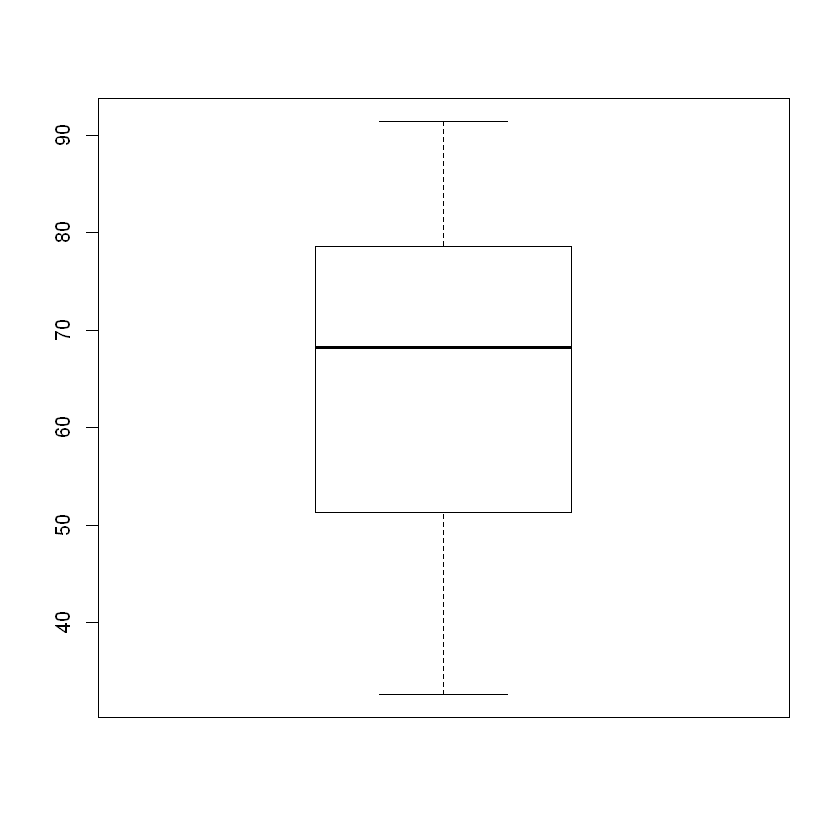

In [9]:
# In Daily.Time.Spent.on.Site
boxplot(advertising$Daily.Time.Spent.on.Site)

there are no outliers in the time spent on site columns

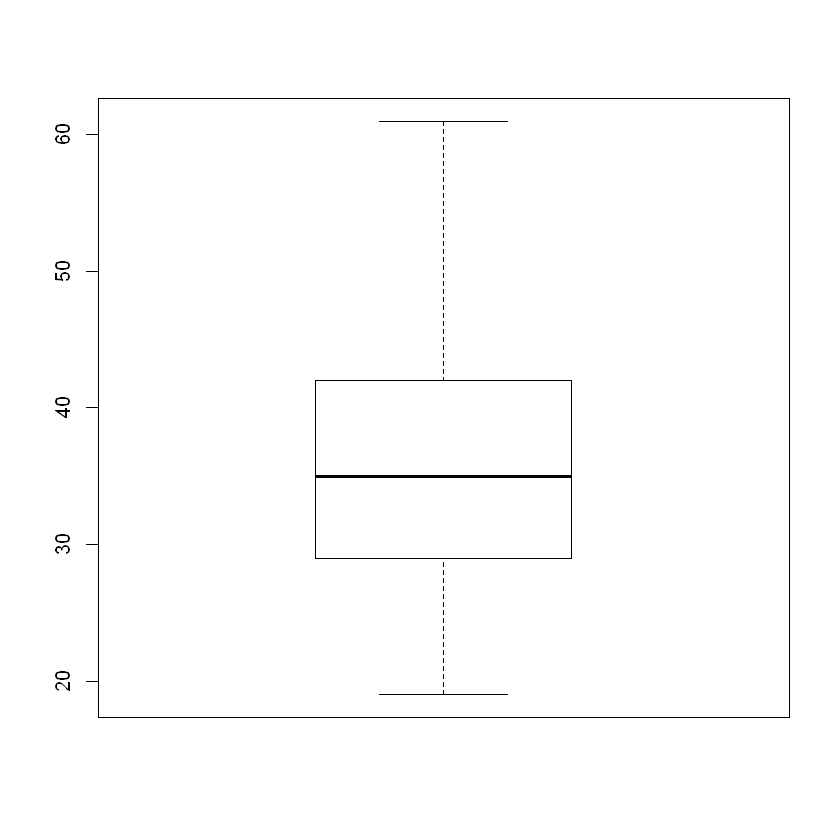

In [10]:
# In Age  
boxplot(advertising$Age)

there are no outliers in the Age column

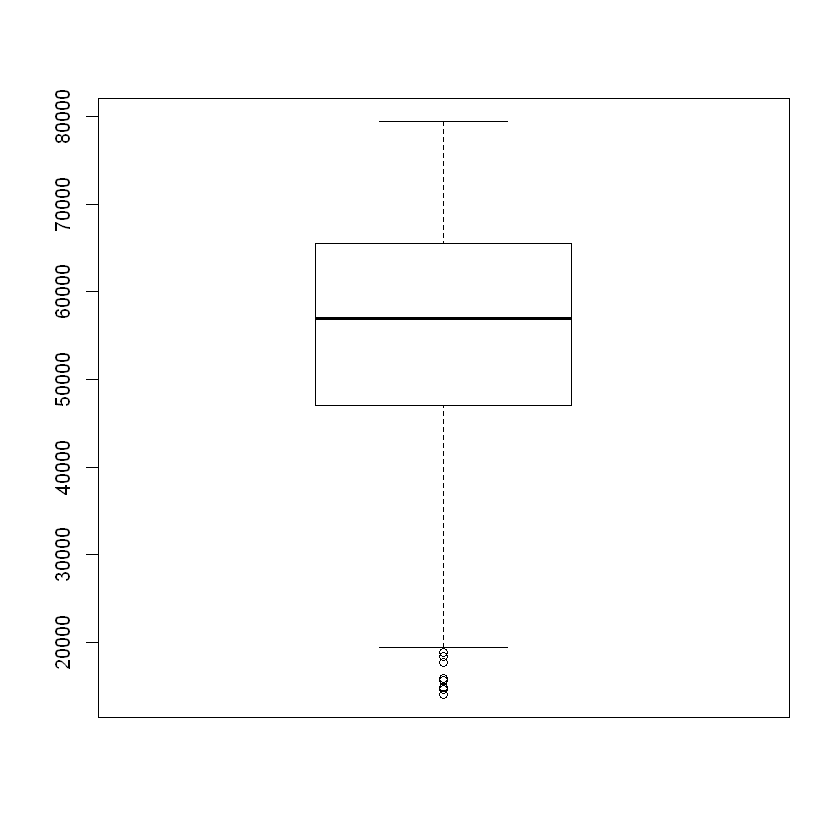

In [11]:
# In Area.Income
boxplot(advertising$Area.Income)

there are outliers that are less than 20,000. The outliers look valid since they are from a dataset that has been collected by the entrepreneur over a period of time

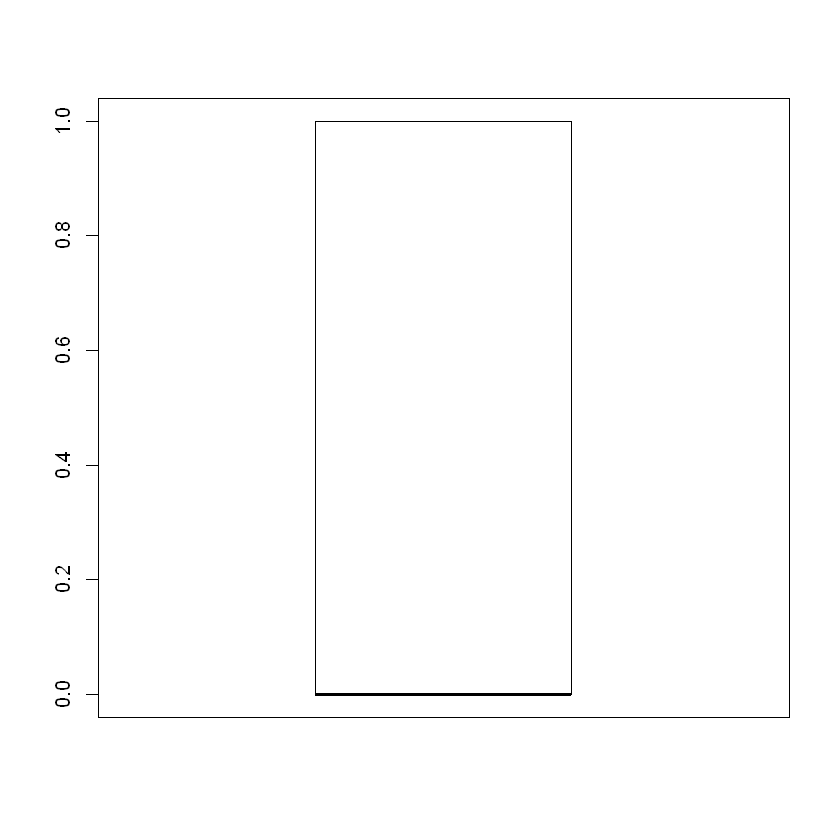

In [12]:
# Male
boxplot(advertising$Male)

there are no outliers in the column

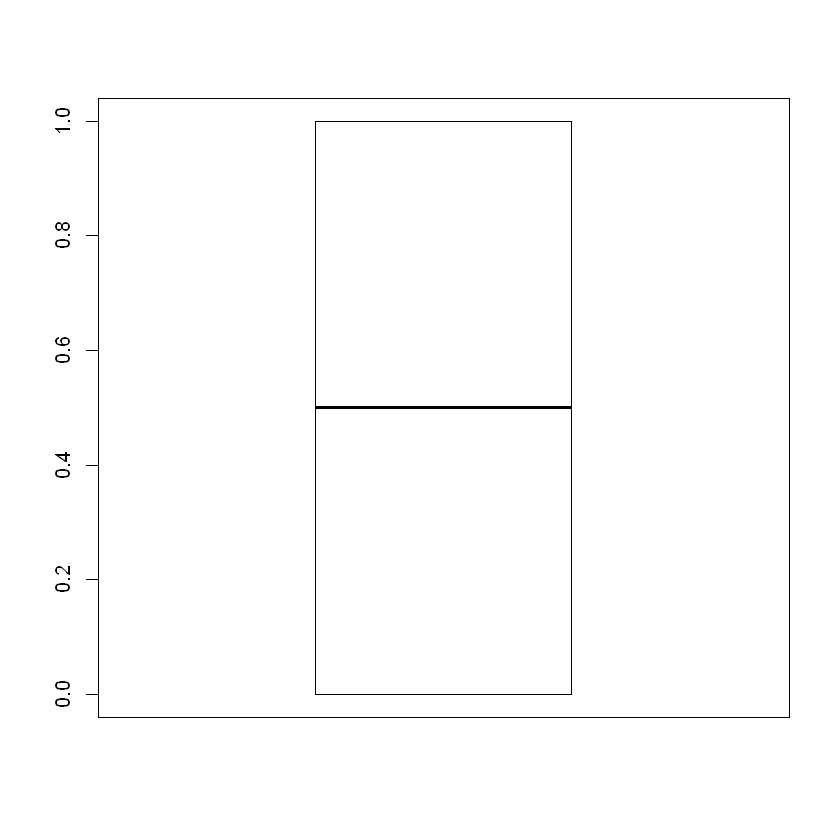

In [13]:
# Clicked.on.Ad
boxplot(advertising$Clicked.on.Ad)

there are no clicks on ad

# Feature engineering

In [14]:
# Making the column names uniform
names(advertising)[names(advertising)=="Daily.Time.Spent.on.Site"] <- "daily_time_spent_on_site"
names(advertising)[names(advertising)=="Age"] <- "age"
names(advertising)[names(advertising)=="Area.Income"] <- "area_income"
names(advertising)[names(advertising)=="Daily.Internet.Usage"] <- "daily_internet_usage"
names(advertising)[names(advertising)=="Ad.Topic.Line"] <- "ad_topic_line"
names(advertising)[names(advertising)=="City"] <- "city"
names(advertising)[names(advertising)=="Male"] <- "sex" #changing the male name to sex because is representing males and female
names(advertising)[names(advertising)=="Country"] <- "country"
names(advertising)[names(advertising)=="Timestamp"] <- "timestamp"
names(advertising)[names(advertising)=="Clicked.on.Ad"] <- "clicked_on_ad"

In [15]:
# Removing the ad_topic_line column because i do not see its relevancy
advertising$ad_topic_line <- NULL

# Univariate data analysis

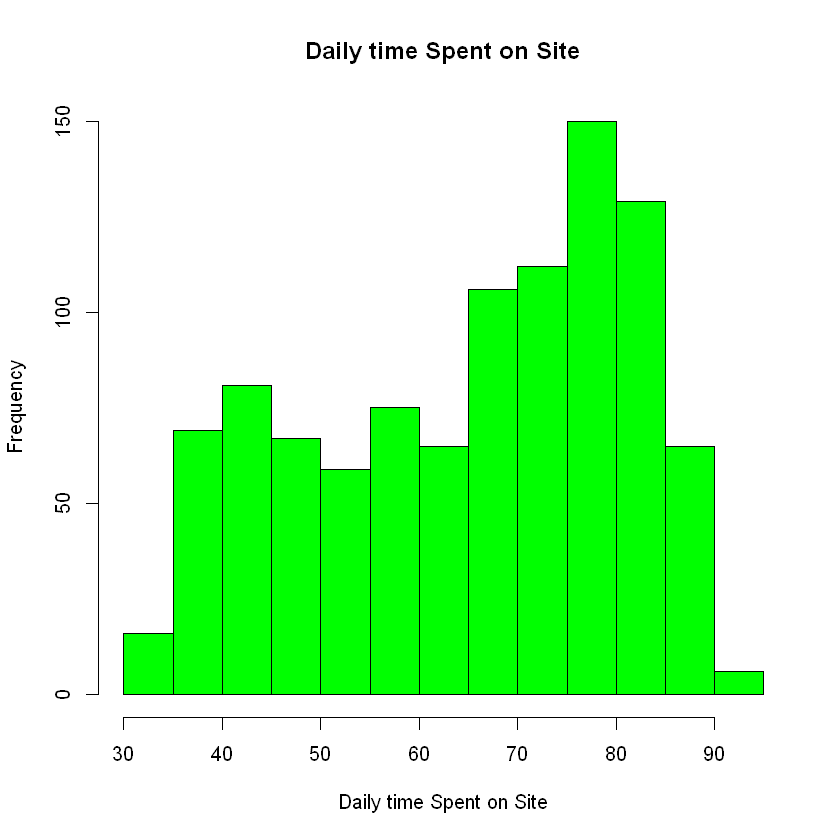

In [16]:
# Daily time spent on site
x = hist(advertising$daily_time_spent_on_site,
         main = "Daily time Spent on Site",
         xlab = "Daily time Spent on Site",
         col ='green')

the data is skewed to the left and most of the data is distributed between 65 and 85 

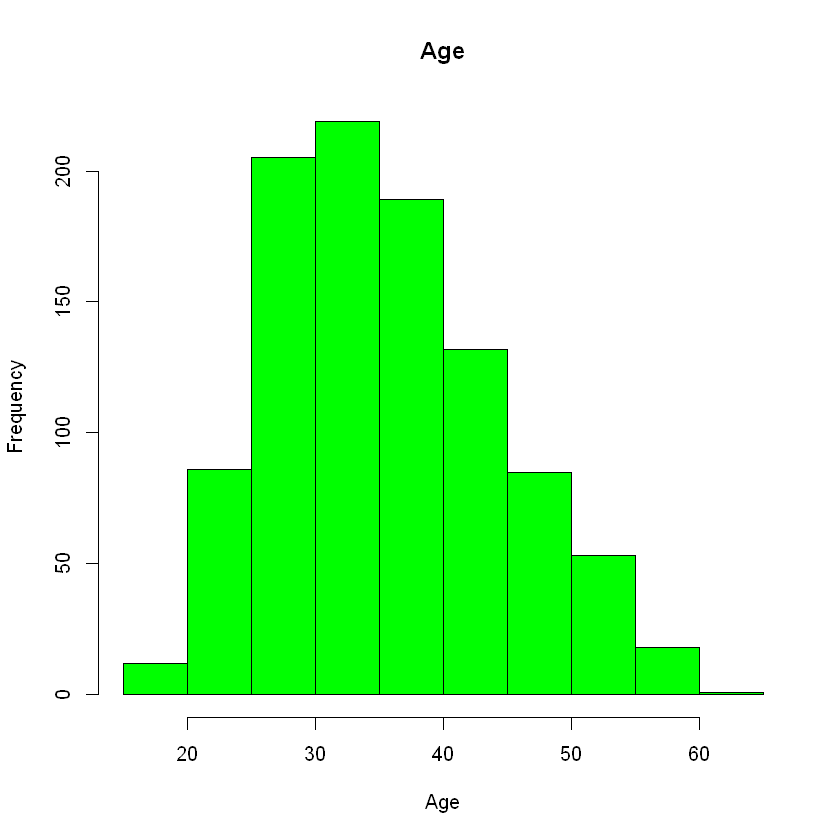

In [17]:
x = hist(advertising$age,
         main = "Age",
         xlab = "Age",
         col ='green')

data is skewed to the right and most of the data is distributed between 25 and 40

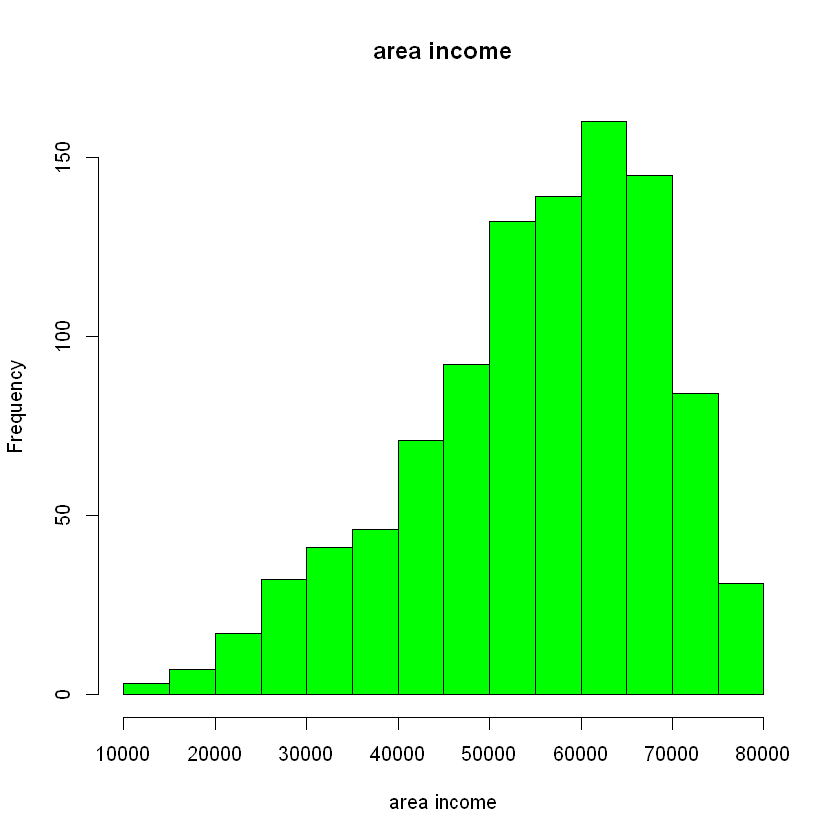

In [18]:
# Area_income
x = hist(advertising$area_income,
         main = "area income",
         xlab = "area income",
         col ='green')

data is skewed to the left and most of the data is distributed between 50,000 and 70,000

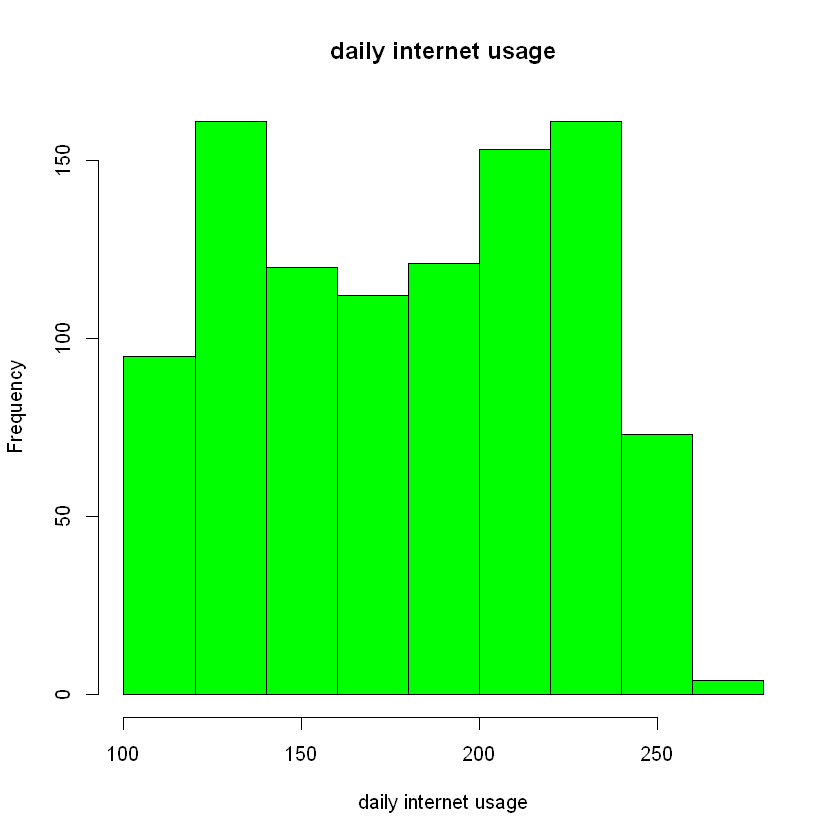

In [19]:
x = hist(advertising$daily_internet_usage,
         main = "daily internet usage",
         xlab = "daily internet usage",
         col ='green')

data is used a lot and most of it is distributed between 200 and 225


  0   1 
519 481 

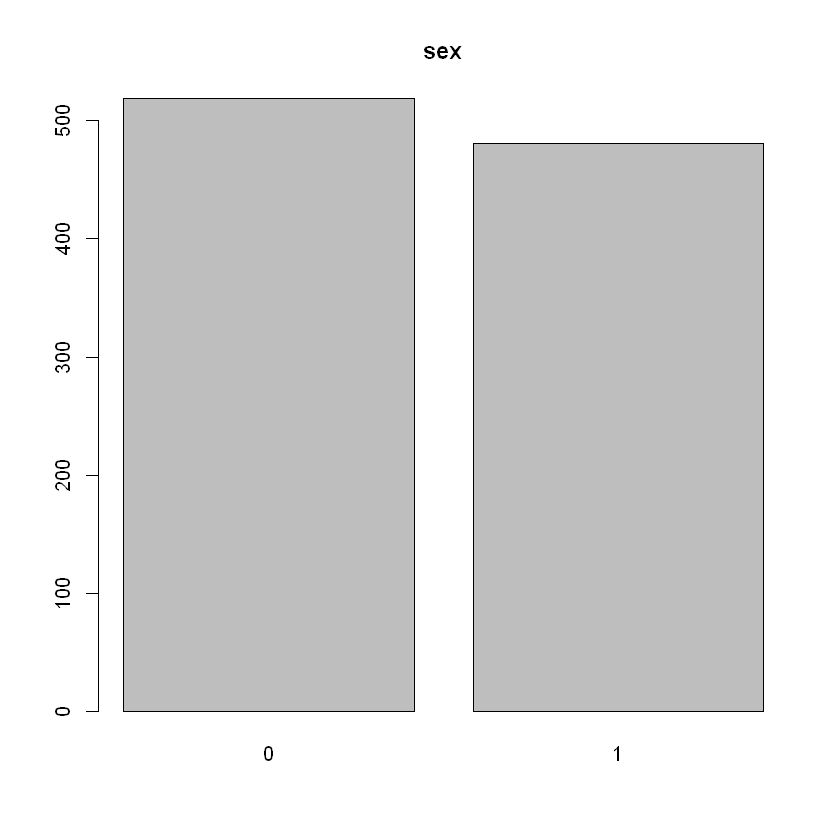

In [20]:
# Sex
table(advertising$sex) # there are 519 males and 481 females

barplot(table(advertising$sex),
    main="sex")


                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  6 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                          Arg

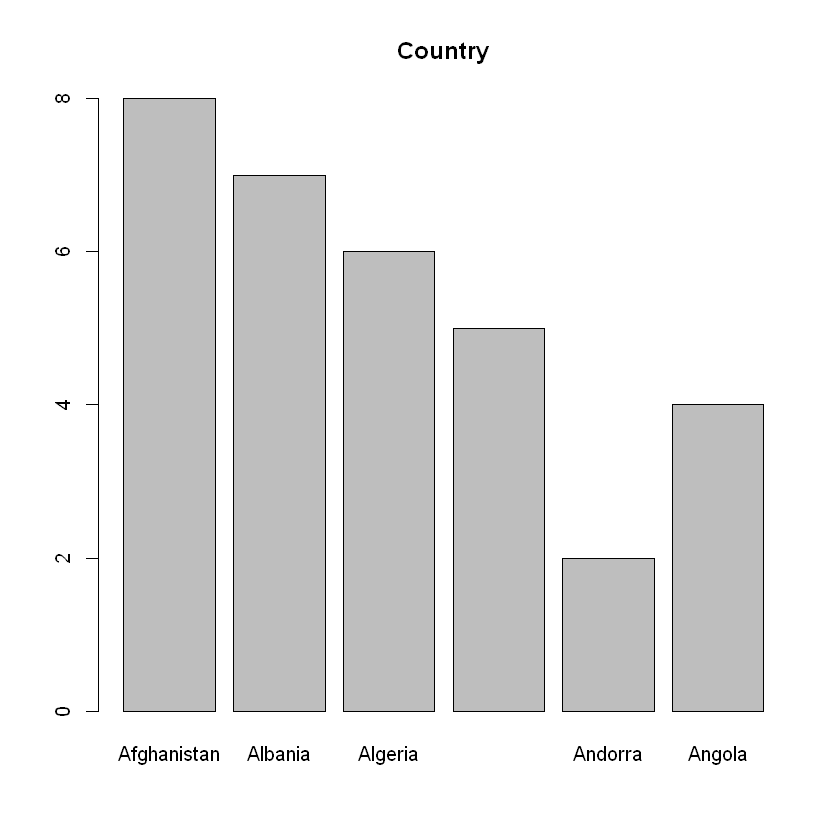

In [21]:
# Country
table(advertising$country)
sample <- head(table(advertising$country))
barplot(sample, main="Country")

we see that afghanistan has the most appearance.

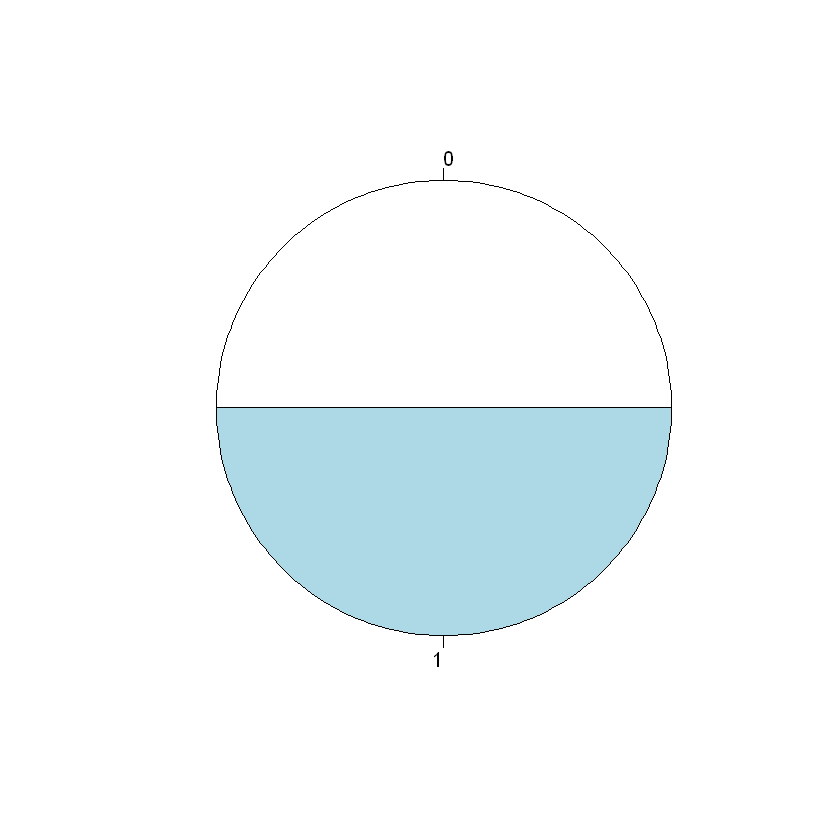

In [22]:
# Clicked_on_ad

pie(table(advertising$clicked_on_ad))

there are 500 no clicks and 500 click on ads

# Bivariate Analysis

In [23]:
# Converting variables into string so as to enable to make good visualisations.
a = c('city', 'country')
for (i in a) {
  advertising[,i] = as.factor(advertising[,i])
}

In [24]:
# Converting variables into factors so as to enable to make good visualisations.
b = c('sex', 'clicked_on_ad')
for (i in b) {
advertising[,i] = as.factor(advertising[,i])
}

In [25]:
# Importing the ggplot library
library(ggplot2)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


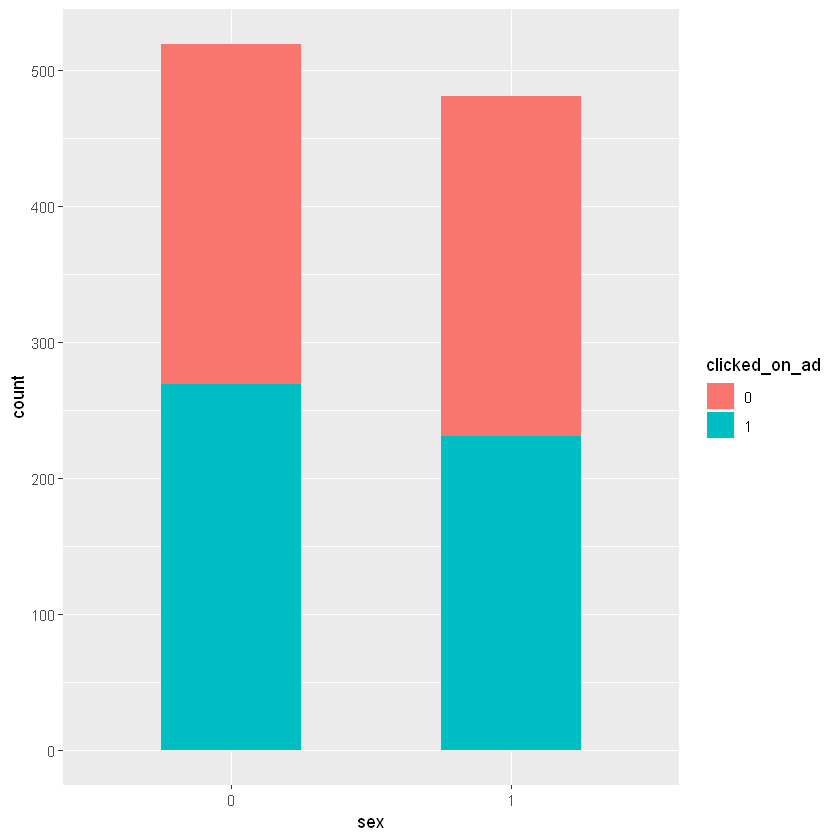

In [27]:
sex_vs_ad = ggplot(data = advertising, aes(x = sex, fill = clicked_on_ad))+
geom_bar(width = 0.5)
sex_vs_ad


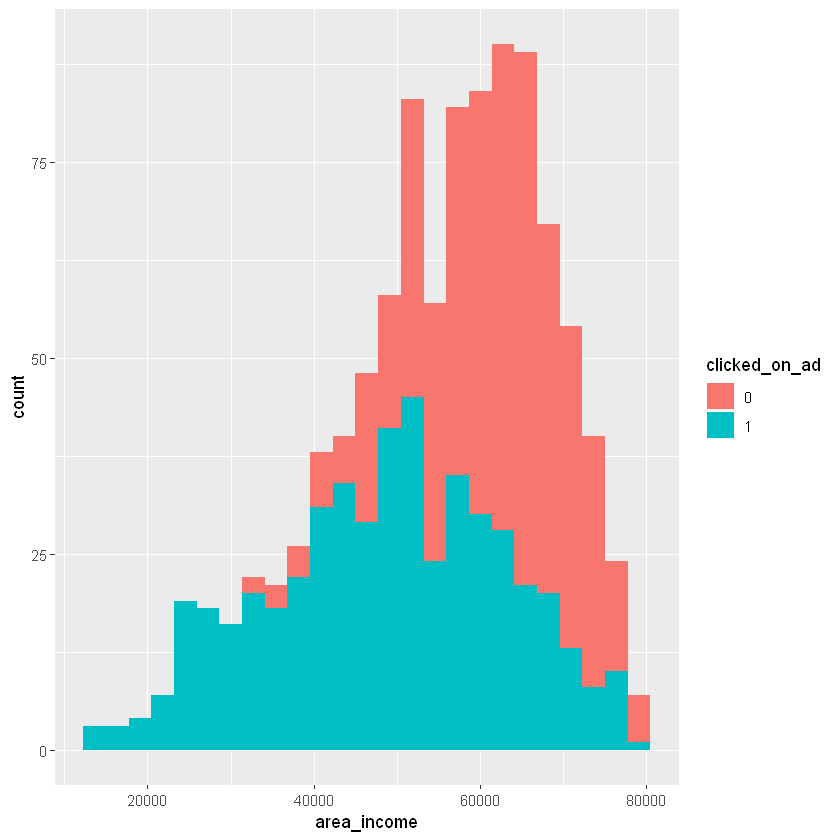

In [28]:
# Area_income vs clicked on ad
area_vs_ad = ggplot(data = advertising, aes(x = area_income, fill = clicked_on_ad))+ 
geom_histogram(bins = 25)
area_vs_ad

many people who had an income between 50,000 and 70,000 did not click on the ad compared to those who did

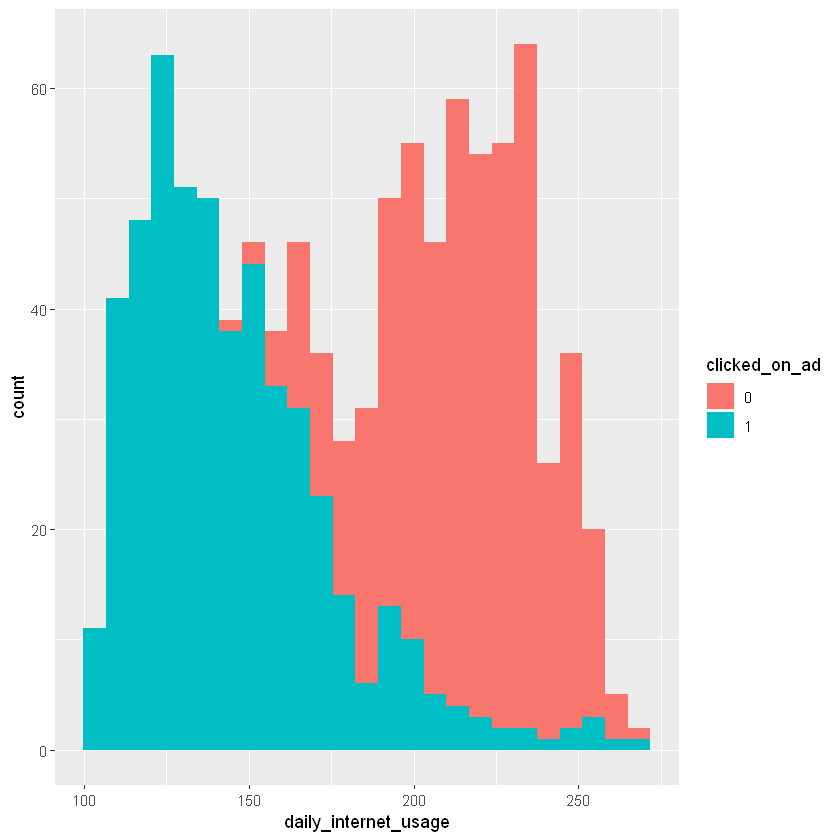

In [29]:
# Daily_internet_usage vs clicked on ad
daily_vs_ad = ggplot(data = advertising, aes(x = daily_internet_usage, fill = clicked_on_ad))+ 
geom_histogram(bins = 25)
daily_vs_ad

between 100 and 150 there are more people who clicked the ad than those who did not.

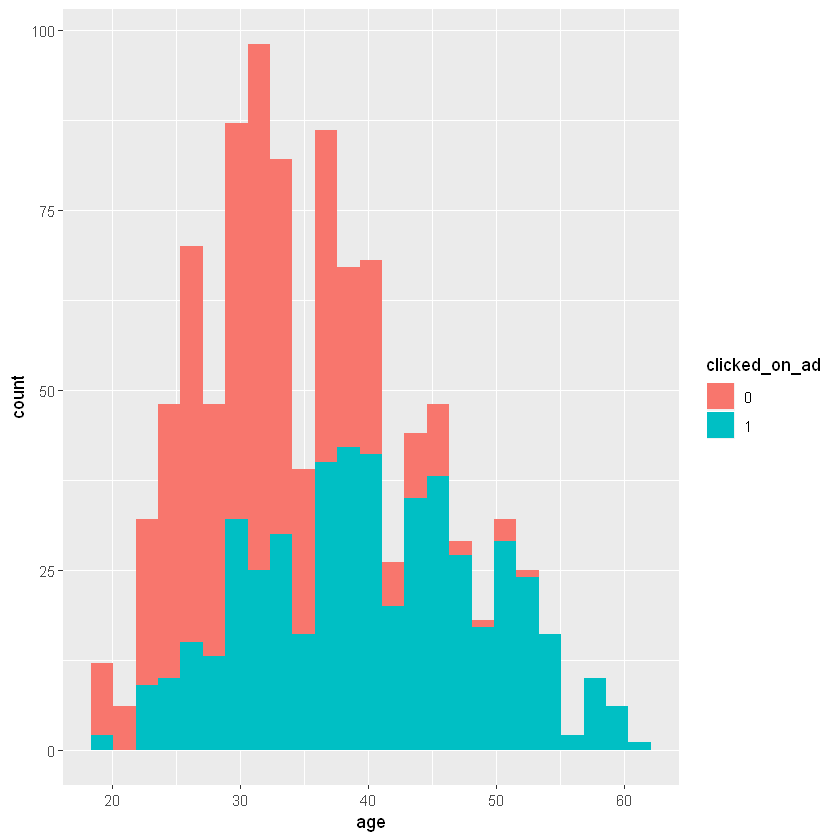

In [30]:
# Age vs clicked on ad
age_vs_ad = ggplot(data = advertising, aes(x = age, fill = clicked_on_ad))+ 
geom_histogram(bins = 25)
age_vs_ad

generally many people do not click ads

# Recommendation

The entrepreneur should focus on people with an income between 10,000 and 50,000
The entrepreneur should focus on people with the age between 45 and 60
The entrepreneur should focus on people with a daily internet usage between 100 and 175

# Modelling

## KNN

In [31]:
# Creating a random number equal 90% of total number of rows
rand <- sample(1:nrow(advertising),0.9 * nrow(advertising))

In [32]:
# The normalization function is created
normal <-function(x) { (x -min(x))/(max(x)-min(x))   }
 
# Normalization function is applied to the dataframe
advert <- as.data.frame(lapply(advertising[,c(1,2,3,4)], normal))

In [33]:
# The training dataset extracted
advert_train <- advert[rand,]

In [34]:
# The test dataset extracted
advert_test <- advert[-rand,]

In [35]:
# getting the training and test data from the target
advert_target <- advertising[rand,9]
test_advert <- advertising[-rand,9]

In [36]:
# Running the knn function
library(class)
pr <- knn(advert_train,advert_test,cl=advert_target,k=20)

In [37]:
# Creating the confucion matrix
tb <- table(pr,test_advert)
tb

   test_advert
pr   0  1
  0 49  1
  1  0 50

there are 49 and 50 correctly predicted items

In [38]:
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)

[1] 99

the accuracy score is 99% which is very good

## SVM

In [ ]:

# We will now install and load the required packages
# ---
#  
install.packages('tidyverse')
library(tidyverse)

install.packages('ggplot2')
library(ggplot2)

install.packages('caret')
library(caret)

install.packages('caretEnsemble')
library(caretEnsemble)

install.packages('psych')
library(psych)

install.packages('Amelia')
library(Amelia)

install.packages('mice')
library(mice)

install.packages('GGally')
library(GGally)

install.packages('rpart')
library(rpart)

install.packages('randomForest')
library(randomForest)

also installing the dependencies 'desc', 'pkgbuild', 'rprojroot', 'pkgload', 'praise', 'testthat', 'ellipsis', 'isoband', 'vctrs', 'lifecycle', 'dbplyr', 'dplyr', 'ggplot2', 'haven', 'hms', 'httr', 'modelr', 'pillar', 'purrr', 'reprex', 'rlang', 'rvest', 'tibble', 'tidyr', 'xml2'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
vctrs      0.2.3  0.2.4              TRUE
lifecycle  0.1.0  0.2.0             FALSE
dplyr      0.8.4  0.8.5              TRUE
ggplot2    3.2.1  3.3.0             FALSE
xml2       1.2.2  1.2.5              TRUE

  Binaries will be installed
package 'desc' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'rprojroot' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'dbplyr' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacke

Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\I\Anaconda3\envs\r\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\I\Anaconda3\envs\r\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"

package 'haven' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'httr' successfully unpacked and MD5 sums checked


In [ ]:
# splitting the dataset into train and test
intrain <- createDataPartition(y = advertising$clicked_on_ad, p= 0.7, list = FALSE)
training <- advertising[intrain,]
testing <- advertising[-intrain,]

In [ ]:
# We check the dimensions of out training dataframe and testing dataframe
# ---
# 
dim(training); 
dim(testing);

In [ ]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(clicked_on_ad ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [ ]:
# We can then check the reult of our train() model as shown below
# ---
# 
svm_Linear

In [ ]:
# We can use the predict() method for predicting results as shown below. 
# We pass 2 arguements, our trained model and our testing data frame.
# ---
# 
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

In [ ]:
# Now checking for our accuracy of our model by using a confusion matrix 
# ---
# 
confusionMatrix(table(test_pred, testing$clicked_on_ad))

144 and 133 items were correctly predicted
the accuracy is 92.33% 

# Naive Bayes

In [ ]:
# Splitting data into training and test data sets
# ---
# 
indxTrain <- createDataPartition(y = advertising$clicked_on_ad,p = 0.75,list = FALSE)
training <- advertising[indxTrain,]
testing <- advertising[-indxTrain,]

In [ ]:
x = training[,-9]
y = training$clicked_on_ad

In [ ]:
# Loading our inbuilt e1071 package that holds the Naive Bayes function.
# ---
# 
library(e1071)

In [ ]:
# Now building our model 
# ---
# 
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))

In [ ]:
# Model Evalution
# ---
# Predicting our testing set
# 
Predict <- predict(model,newdata = testing )

In [ ]:
# Getting the confusion matrix to see accuracy value and other parameter values
# ---
# 
confusionMatrix(Predict, testing$clicked_on_ad )

there are 120 and 121 corectly predicted click on ads

the accuracy score is 96.4%

# Challenging the model

KNN is the best model of the three . it has an accuracy of 99%.

there is no point of challenging it for its the best

# Recommendation

all is well. we can work with the KNN model.